In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d=pd.read_excel("data.xlsx")
d

,I_nak,U_anod,I_izm,mult,I
0,1.3,0.5,8.1600,0.000001,0.000008
1,1.3,1.0,19.0700,0.000001,0.000019
2,1.3,1.5,33.3000,0.000001,0.000033
3,1.3,2.0,48.7200,0.000001,0.000049
4,1.3,2.5,66.2700,0.000001,0.000066
...,...,...,...,...,...
91,1.6,30.0,2.8852,0.001000,0.002885
92,1.6,35.0,3.5856,0.001000,0.003586
93,1.6,40.0,4.3390,0.001000,0.004339
94,1.6,45.0,5.2040,0.001000,0.005204


In [3]:
#d=d[(d['I_nak']==1.3) & (d['U_anod']>=10)]
#d

In [4]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return np.array([k,b,np.abs(sigk/k),np.abs(sigb/b)])

In [71]:
def plt_val(d, I, c):
    global ax
    d=d[(abs(d['I_nak']-I)<0.01) & (d['U_anod']>=10)]
    #print(d,I)
    a,b,sa,sb=getkb(np.log(d['U_anod']),np.log(d['I']))
    print(a,",",sa,",",b, ",",sb, np.exp(b))
    ax.errorbar(np.log(d['U_anod']),np.log(d['I']),fmt='.r',xerr=0.01/d['U_anod'], yerr=1e-2/d['I_izm'],markersize=2)
    ax.plot(np.log(d['U_anod']),a*np.log(d['U_anod'])+b,c,linewidth=0.5, label="$I_{1}={0}A$".format(I,"{накала}"))
    #ax.plot(np.log(d['U_anod']),a*(1+sa)*np.log(d['U_anod'])+b*(1+sb),'--',c='black',linewidth=0.5)
    #ax.plot(np.log(d['U_anod']),a*(1-sa)*np.log(d['U_anod'])+b*(1-sb),'--',c='black',linewidth=0.5)
    return b

1.4964238924223383 , 0.005160910010718186 , -11.04593310676304 , 0.0003535205592164436 1.5951892132649588e-05
1.4708214264177268 , 0.006342799036601716 , -10.92116910765348 , 0.00043192459206507745 1.8071596477439222e-05
1.4430377033358388 , 0.007563965455251726 , -10.794635331740778 , 0.0005112759966111393 2.050923405069773e-05
1.4099146749693203 , 0.008998379902964102 , -10.6387019527414 , 0.0006029824578437072 2.3970133196304727e-05


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


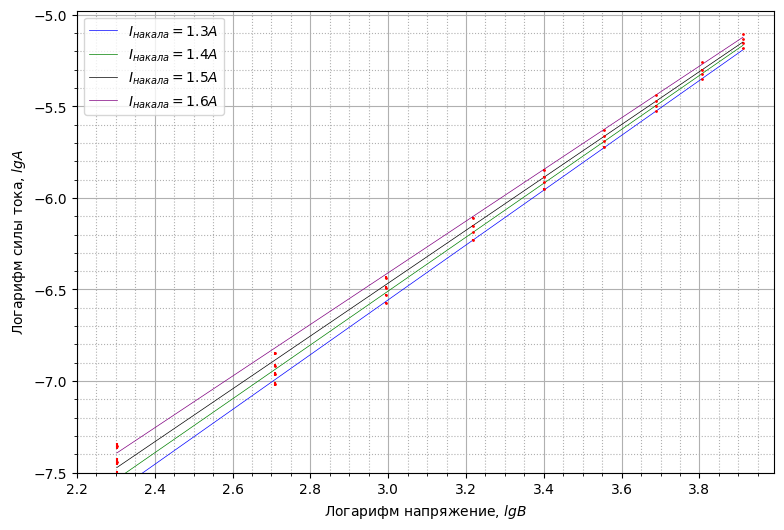

In [72]:
fig,ax = plt.subplots(figsize=(9,6))
cs=["blue","green","black","purple"]
Is=np.array([1.3,1.4,1.5,1.6])
As=np.array([plt_val(d,I,c) for I,c in zip(Is,cs)])
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylim(ymin=plt.gca().get_yticks()[1])
ax.set_xlim(xmin=plt.gca().get_xticks()[0])
#ax.set_xticks([5,6,7,8,9,10])
ax.set_xlabel("Логарифм напряжение, $lg{B}$")
ax.set_ylabel("Логарифм силы тока, $lg{A}$")
ax.legend()
fig.savefig("lg.eps")

In [84]:
def plt_val3(d, I, c):
    global ax
    d=d[(abs(d['I_nak']-I)<0.01) & (d['U_anod']>=6)]
    #print(d,I)
    a,b,sa,sb=getkb((d['U_anod'])**1.5,(d['I']))
    print(a,",",sa,",",b, ",",sb)
    ax.errorbar((d['U_anod'])**1.5,(d['I']),fmt='.r',xerr=0.01/d['U_anod'], yerr=1e-2*d['mult'],markersize=2)
    ax.plot((d['U_anod'])**1.5,a*(d['U_anod'])**1.5+b,c,linewidth=0.5, label="$I_{1}={0}A$".format(I,"{накала}"))
    #ax.plot(np.log(d['U_anod']),a*(1+sa)*np.log(d['U_anod'])+b*(1+sb),'--',c='black',linewidth=0.5)
    #ax.plot(np.log(d['U_anod']),a*(1-sa)*np.log(d['U_anod'])+b*(1-sb),'--',c='black',linewidth=0.5)
    return b

1.5819271804579087e-05 , 0.00217064828303611 , -1.0010877271921306e-05 , 0.3877111379427378
1.6202160369221834e-05 , 0.002710601499574126 , 1.811646699246541e-05 , 0.2740119864177385
1.6481402336945803e-05 , 0.002807453389750523 , 4.753127498136013e-05 , 0.11003522083780055
1.6922873689427048e-05 , 0.0024260897347189157 , 8.536360708361751e-05 , 0.054364160053164905


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


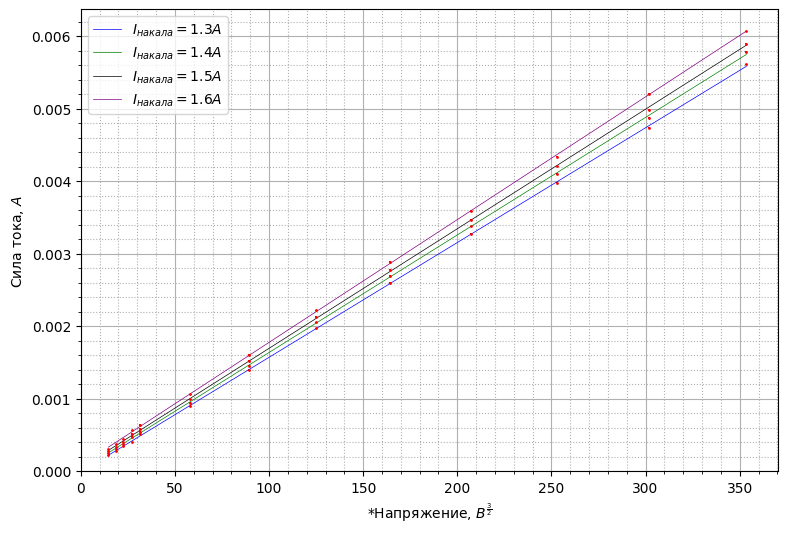

In [85]:
fig,ax = plt.subplots(figsize=(9,6))
cs=["blue","green","black","purple"]
Is=np.array([1.3,1.4,1.5,1.6])
As=np.array([plt_val3(d,I,c) for I,c in zip(Is,cs)])
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylim(ymin=plt.gca().get_yticks()[1])
ax.set_xlim(xmin=plt.gca().get_xticks()[1])
#ax.set_xticks([5,6,7,8,9,10])
ax.set_xlabel(r"*Напряжение, $B^{\frac{3}{2}}$")
ax.set_ylabel("Сила тока, $A$")
ax.legend()
fig.savefig("lg2.eps")

In [68]:
def plt_val2(d, I, c):
    global ax
    d=d[(abs(d['I_nak']-I)<0.01) & (d['U_anod']>=6)]
    #print(d,I)
    a,b,sa,sb=getkb(np.log(d['U_anod']),np.log(d['I']))
    print("alph=",a,"err",sa,"lg A =",b, "err",sb)
    ax.errorbar((d['U_anod']),(d['I']),fmt='.r',xerr=0.01/d['U_anod'], yerr=1e-2*d['mult'],markersize=2)
    ax.plot((d['U_anod']),np.exp(a*np.log(d['U_anod'])+b),c,linewidth=0.5, label="$I_{1}={0}A$".format(I,"{накала}"))
    #ax.plot(np.log(d['U_anod']),a*(1+sa)*np.log(d['U_anod'])+b*(1+sb),'--',c='black',linewidth=0.5)
    #ax.plot(np.log(d['U_anod']),a*(1-sa)*np.log(d['U_anod'])+b*(1-sb),'--',c='black',linewidth=0.5)
    return b

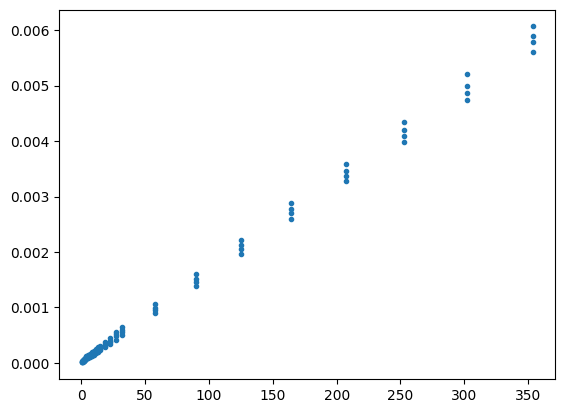

In [15]:
plt.plot(d['U_anod']**1.5,d['I'],'.')

array([ 1.34822724e+00, -1.28050394e+01,  2.78045558e-02,  3.27305381e-04])

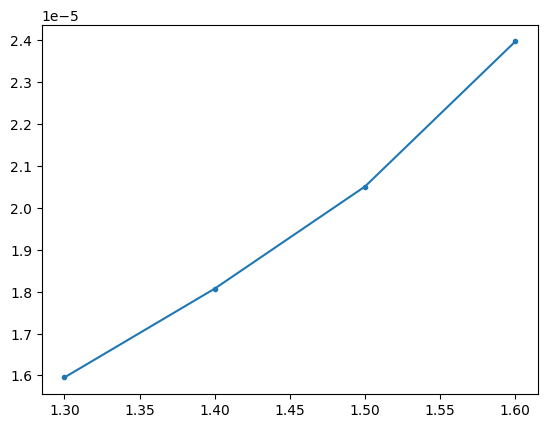

In [16]:
plt.plot(Is,np.exp(As),'.-')
getkb(Is,As)

In [17]:
a,b,sa,sb=getkb(np.log(d['U_anod']),np.log(d['I']))
a,b,sa,sb

(np.float64(1.3240128577726236),
 np.float64(-10.484161550676237),
 np.float64(0.014391876117985543),
 np.float64(0.0022326489270703526))

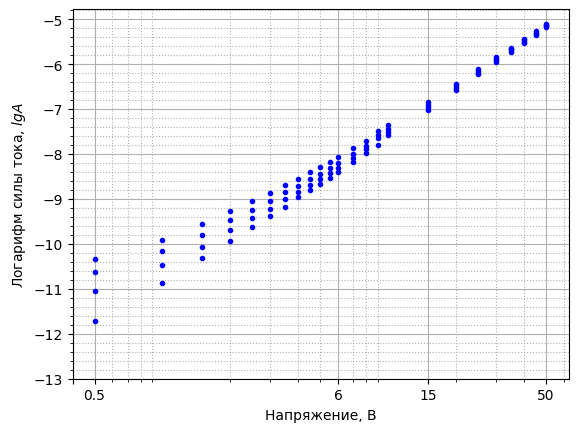

In [43]:
#plt.errorbar(X*1000,Y,fmt='.r',xerr=0, yerr=epnu,markersize=5)
plt.plot((d['U_anod']),np.log(d['I']),'.b',linewidth=0.5)
#plt.plot(np.log(d['U_anod']),a*np.log(d['U_anod'])+b,'red',linewidth=0.5)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xscale("log")
uch=[0.4, 0.5, 6, 15, 50]
plt.xticks(uch, labels=[str(el) if el!=0.4 else '' for el in uch])
plt.ylim(ymin=plt.gca().get_yticks()[0])
plt.xlim(xmin=plt.gca().get_xticks()[0])
plt.xlabel("Напряжение, В")
plt.ylabel("Логарифм силы тока, $lg{А}$")
plt.savefig("lg0.eps")

In [91]:
alph=0.98**0.5
alph

0.9899494936611666

In [92]:
ra=9.5e-3
rk=0.9e-3
l=9e-3
e0=1/(9e9*4*np.pi)
e0

8.841941282883074e-12

In [93]:
a0,_,sa0,_=getkb(d['U_anod']**(a),d['I'])
a0,sa0,np.exp(b)

(np.float64(3.219547297652503e-05),
 np.float64(0.006304644247314167),
 np.float64(2.7976056162630666e-05))

In [94]:
np.exp(-10.6)

np.float64(2.4916009731503204e-05)

In [95]:
(((1.58e-5*9*ra/alph)/(4*e0*2*np.pi*l))**2)/2

232771786989.79596

In [96]:
260e9

260000000000.0

In [88]:
1.60217663e-19/9.1093837e-31

175882000667.07037

In [98]:
(232771786989.79596-175882000667.07037)/(175882000667.07037)

0.3234542824561855

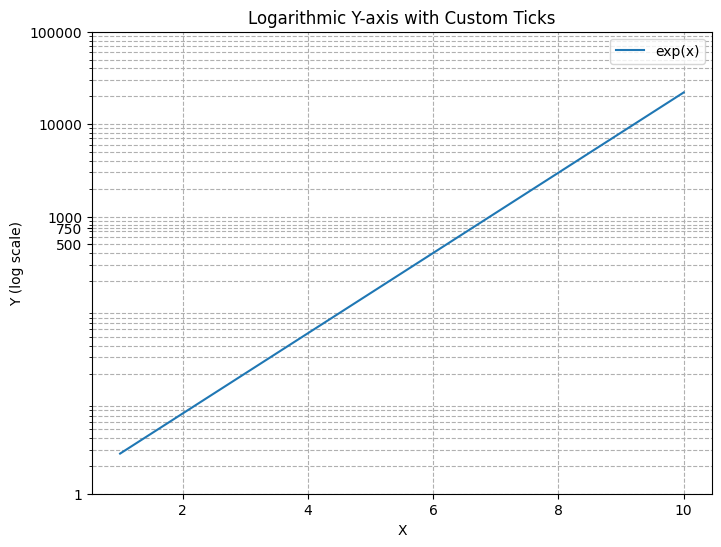

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
x = np.linspace(1, 10, 100)
y = np.exp(x)  # Быстро растущая функция — хорошо для лог-шкалы

# Создание графика
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='exp(x)')

# Устанавливаем логарифмическую шкалу по оси Y
plt.yscale('log')

# Задаём кастомные ticks по оси Y
custom_ticks = [1, 500, 750, 1000, 10000, 100000]
plt.yticks(custom_ticks, labels=[str(t) for t in custom_ticks])

# Опционально: форматирование для научной нотации или красивых подписей
# plt.yticks(custom_ticks, labels=['1', '10', '10²', '10³', '10⁴', '10⁵'])

plt.xlabel('X')
plt.ylabel('Y (log scale)')
plt.title('Logarithmic Y-axis with Custom Ticks')
plt.legend()
plt.grid(True, which="both", ls="--")  # Сетка для основных и промежуточных делений
plt.show()